# Для примера эстимации времени было выбрано изучение материалов для разработки сервиса на FastAPI с привлечением LLM
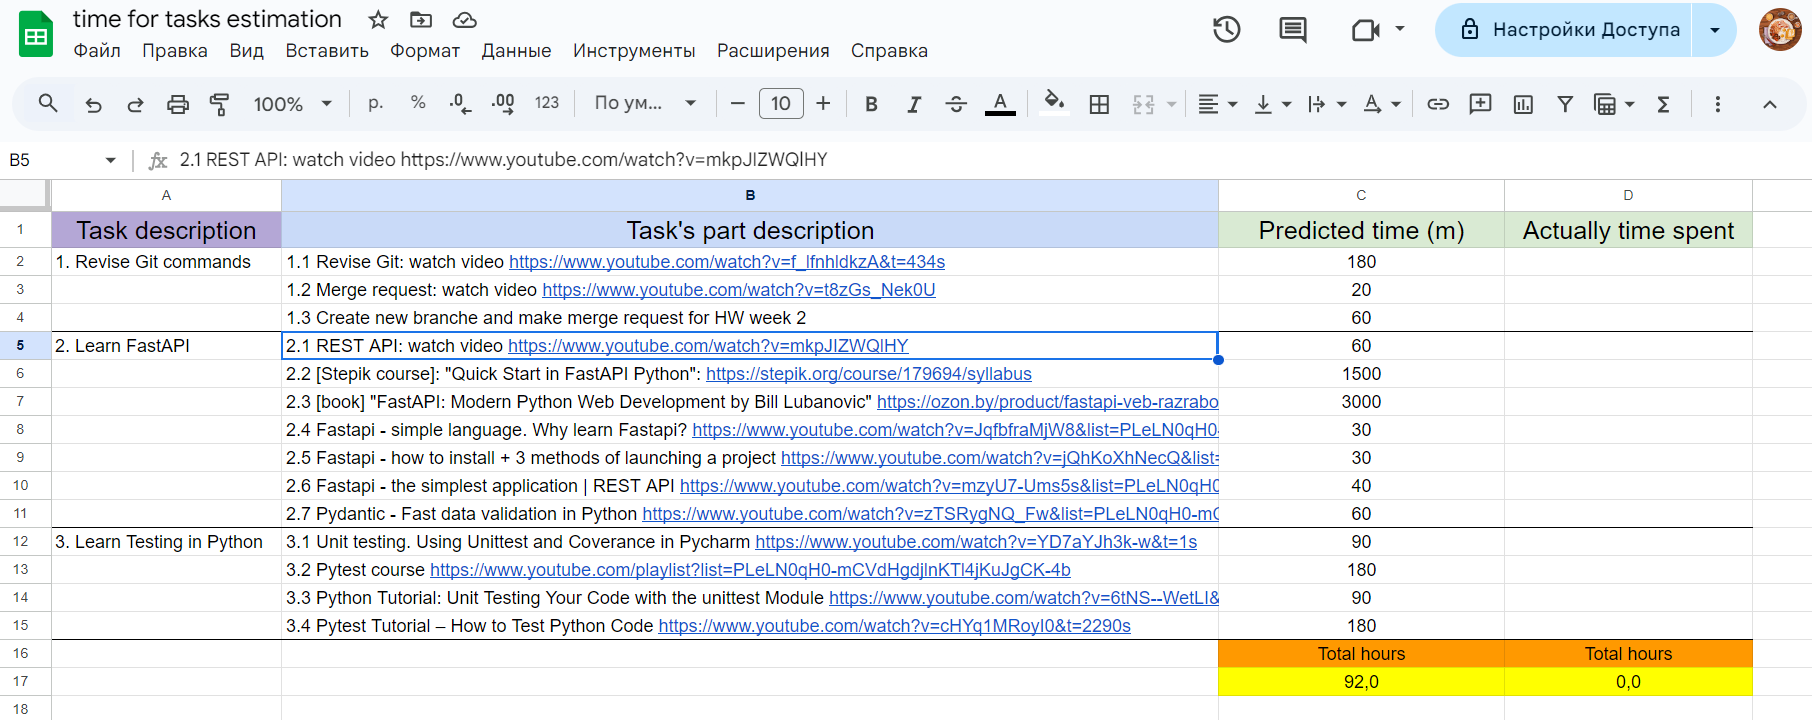
### Планирую потом расширить файл с эстимацией непосредственно выполнением самого проекта (+ сделаю декомпозицию)

### В Jira подготовил отдельный проект под стажировку и добавил в беклог и спринт таски
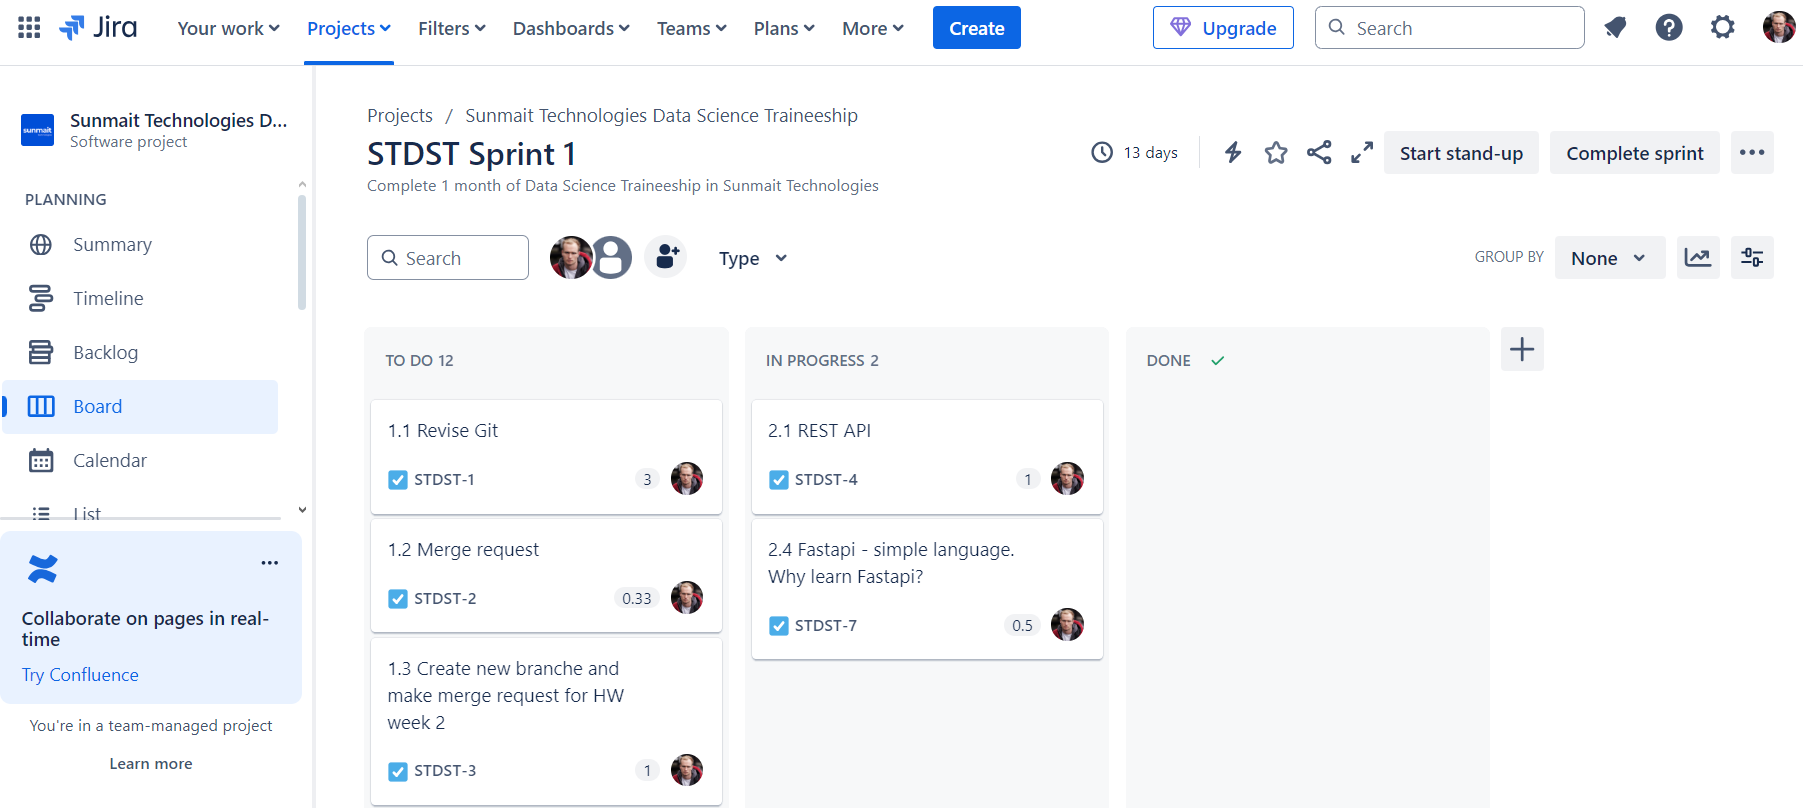
### Добавил краткое описание в виде ссылок к каждой таске и количество story point для каждой
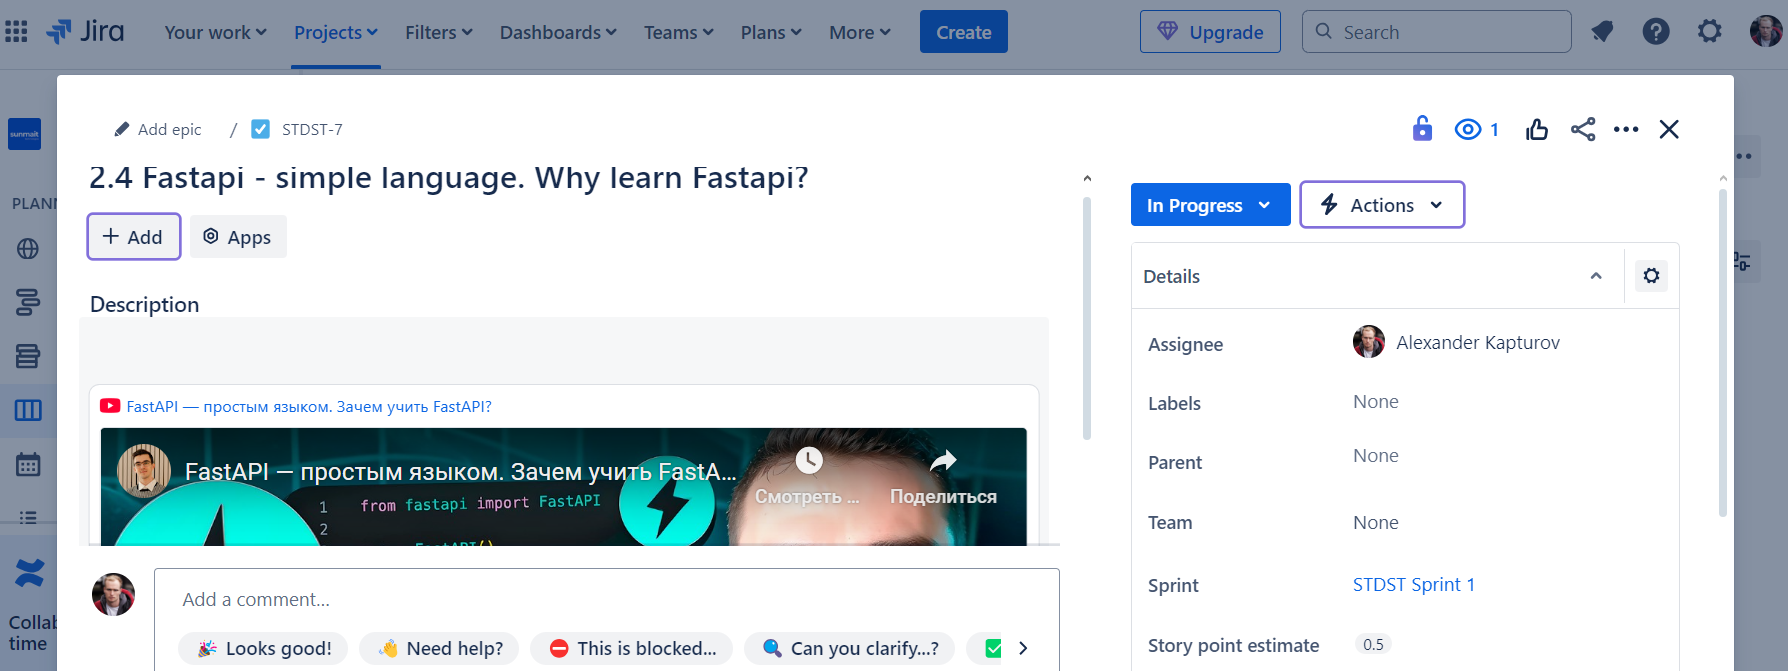

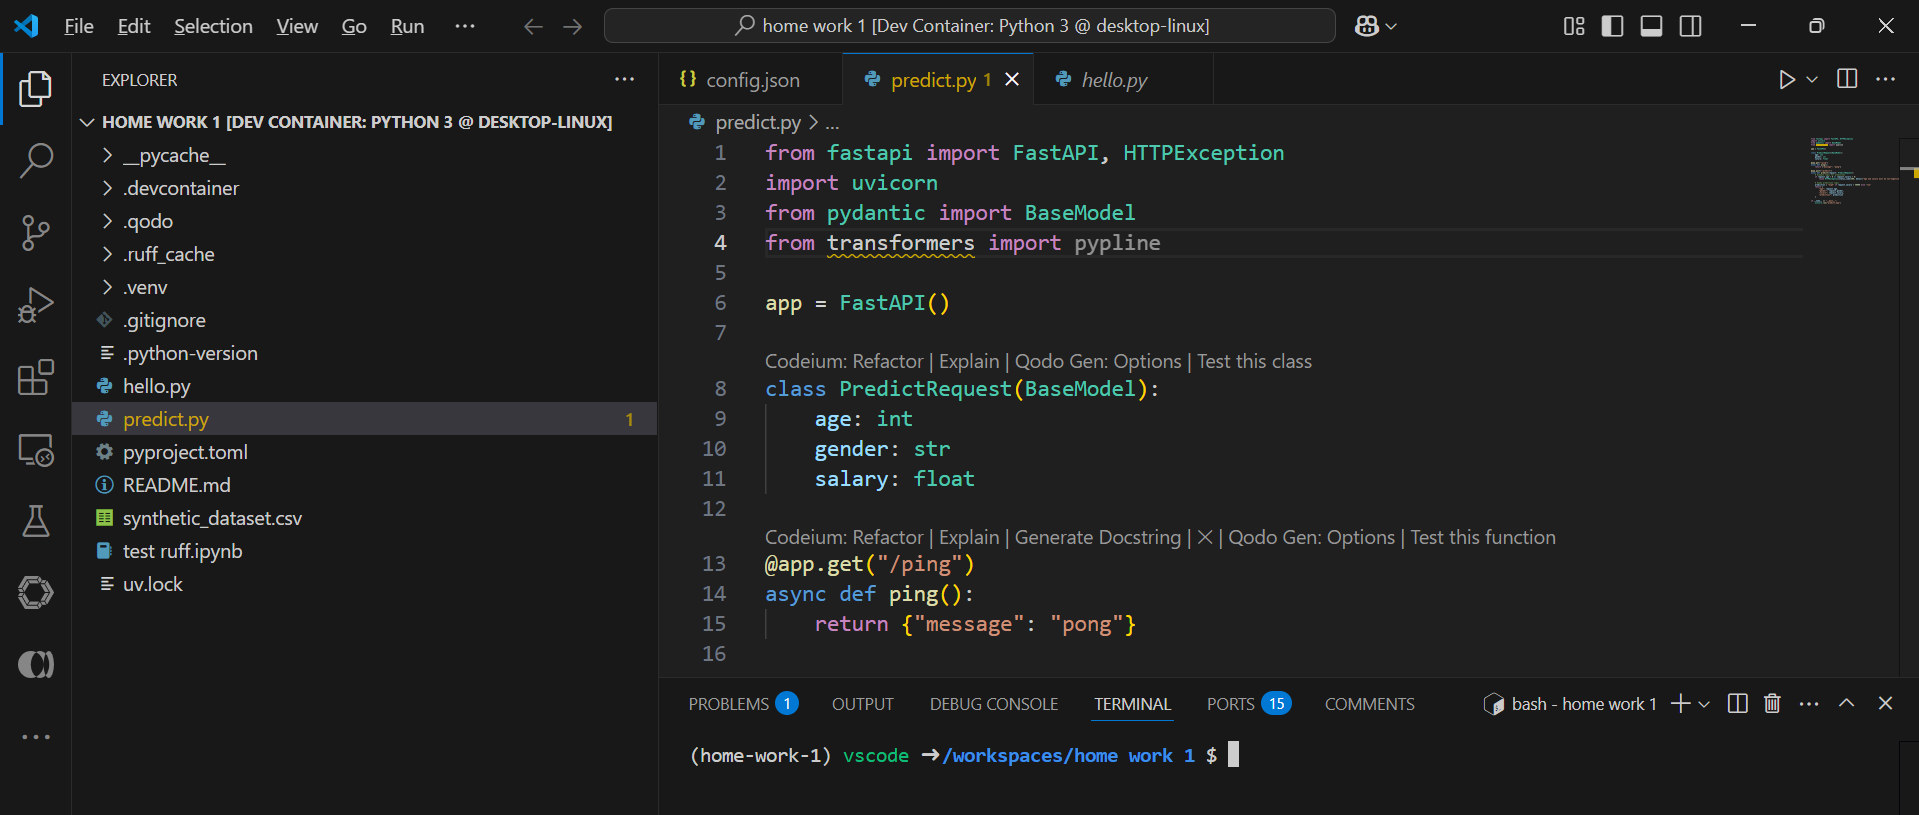
### Очень важно чтобы pyproject.toml находился в той же папке в которой запущен dev container чтобы uv работал

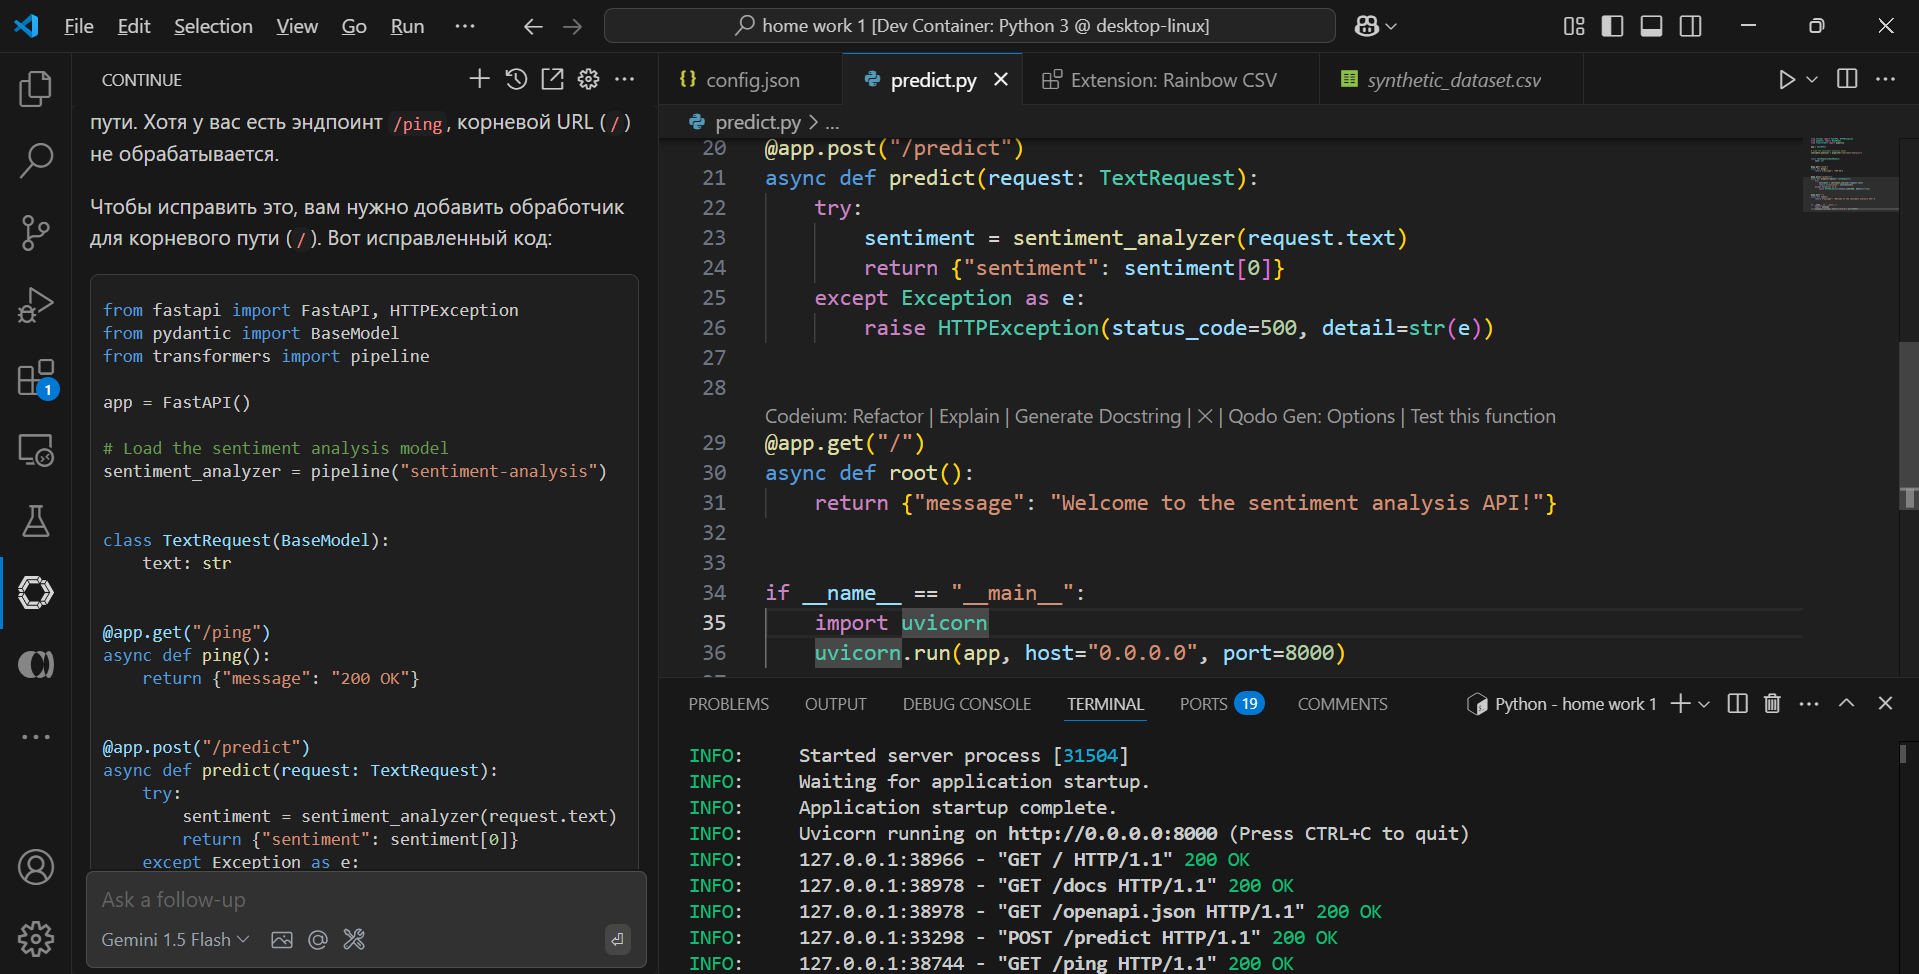
### Код проекта

```
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from transformers import pipeline

app = FastAPI()

# Load the sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")


class TextRequest(BaseModel):
    text: str


@app.get("/ping")
async def ping():
    return {"message": "200 OK"}


@app.post("/predict")
async def predict(request: TextRequest):
    try:
        sentiment = sentiment_analyzer(request.text)
        return {"sentiment": sentiment[0]}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))


@app.get("/")
async def root():
    return {"message": "Welcome to the sentiment analysis API!"} 


if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)
```

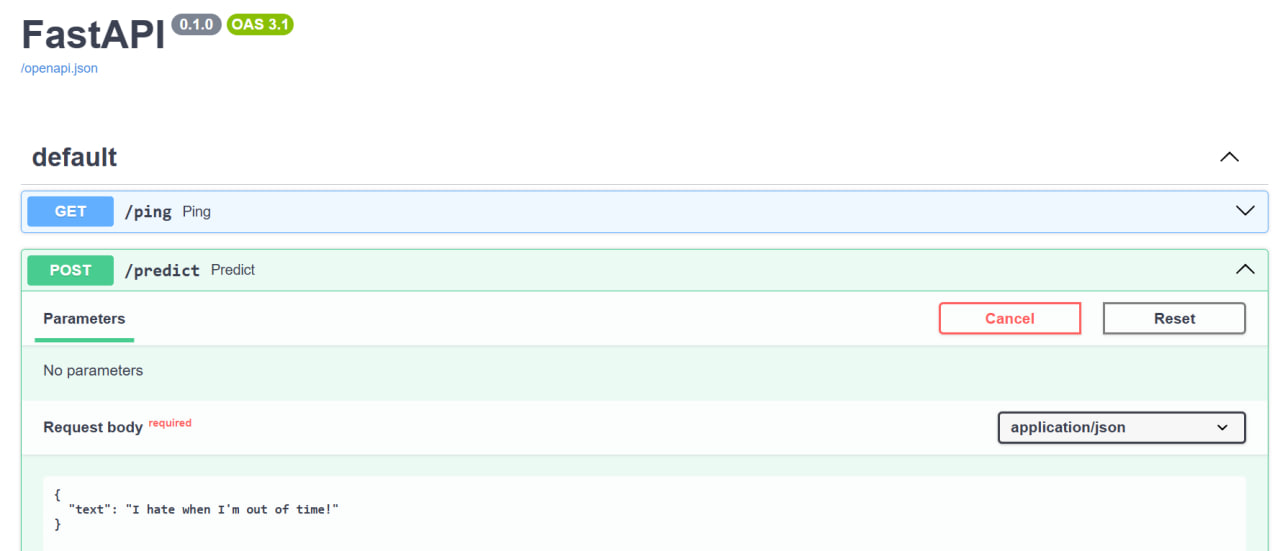
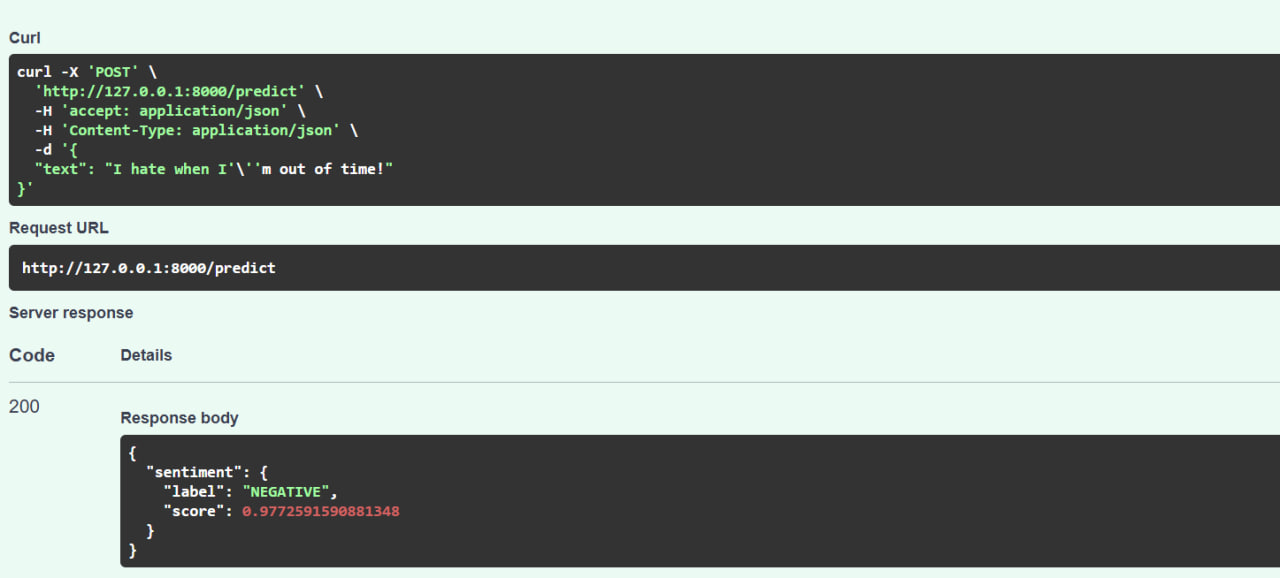